<a href="https://colab.research.google.com/github/Pranaykrishna77/General-Health-Prediction-Using-ML/blob/main/General_Health_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing The Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [ ]:
 !pip install pyreadstat

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Python  Machine Learning /CVD_cleaned (2).xlsx')


# ***IMPORTING THE DATA SET***

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [ ]:
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)            

In [ ]:
df.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
dtype: int64

In [ ]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [ ]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

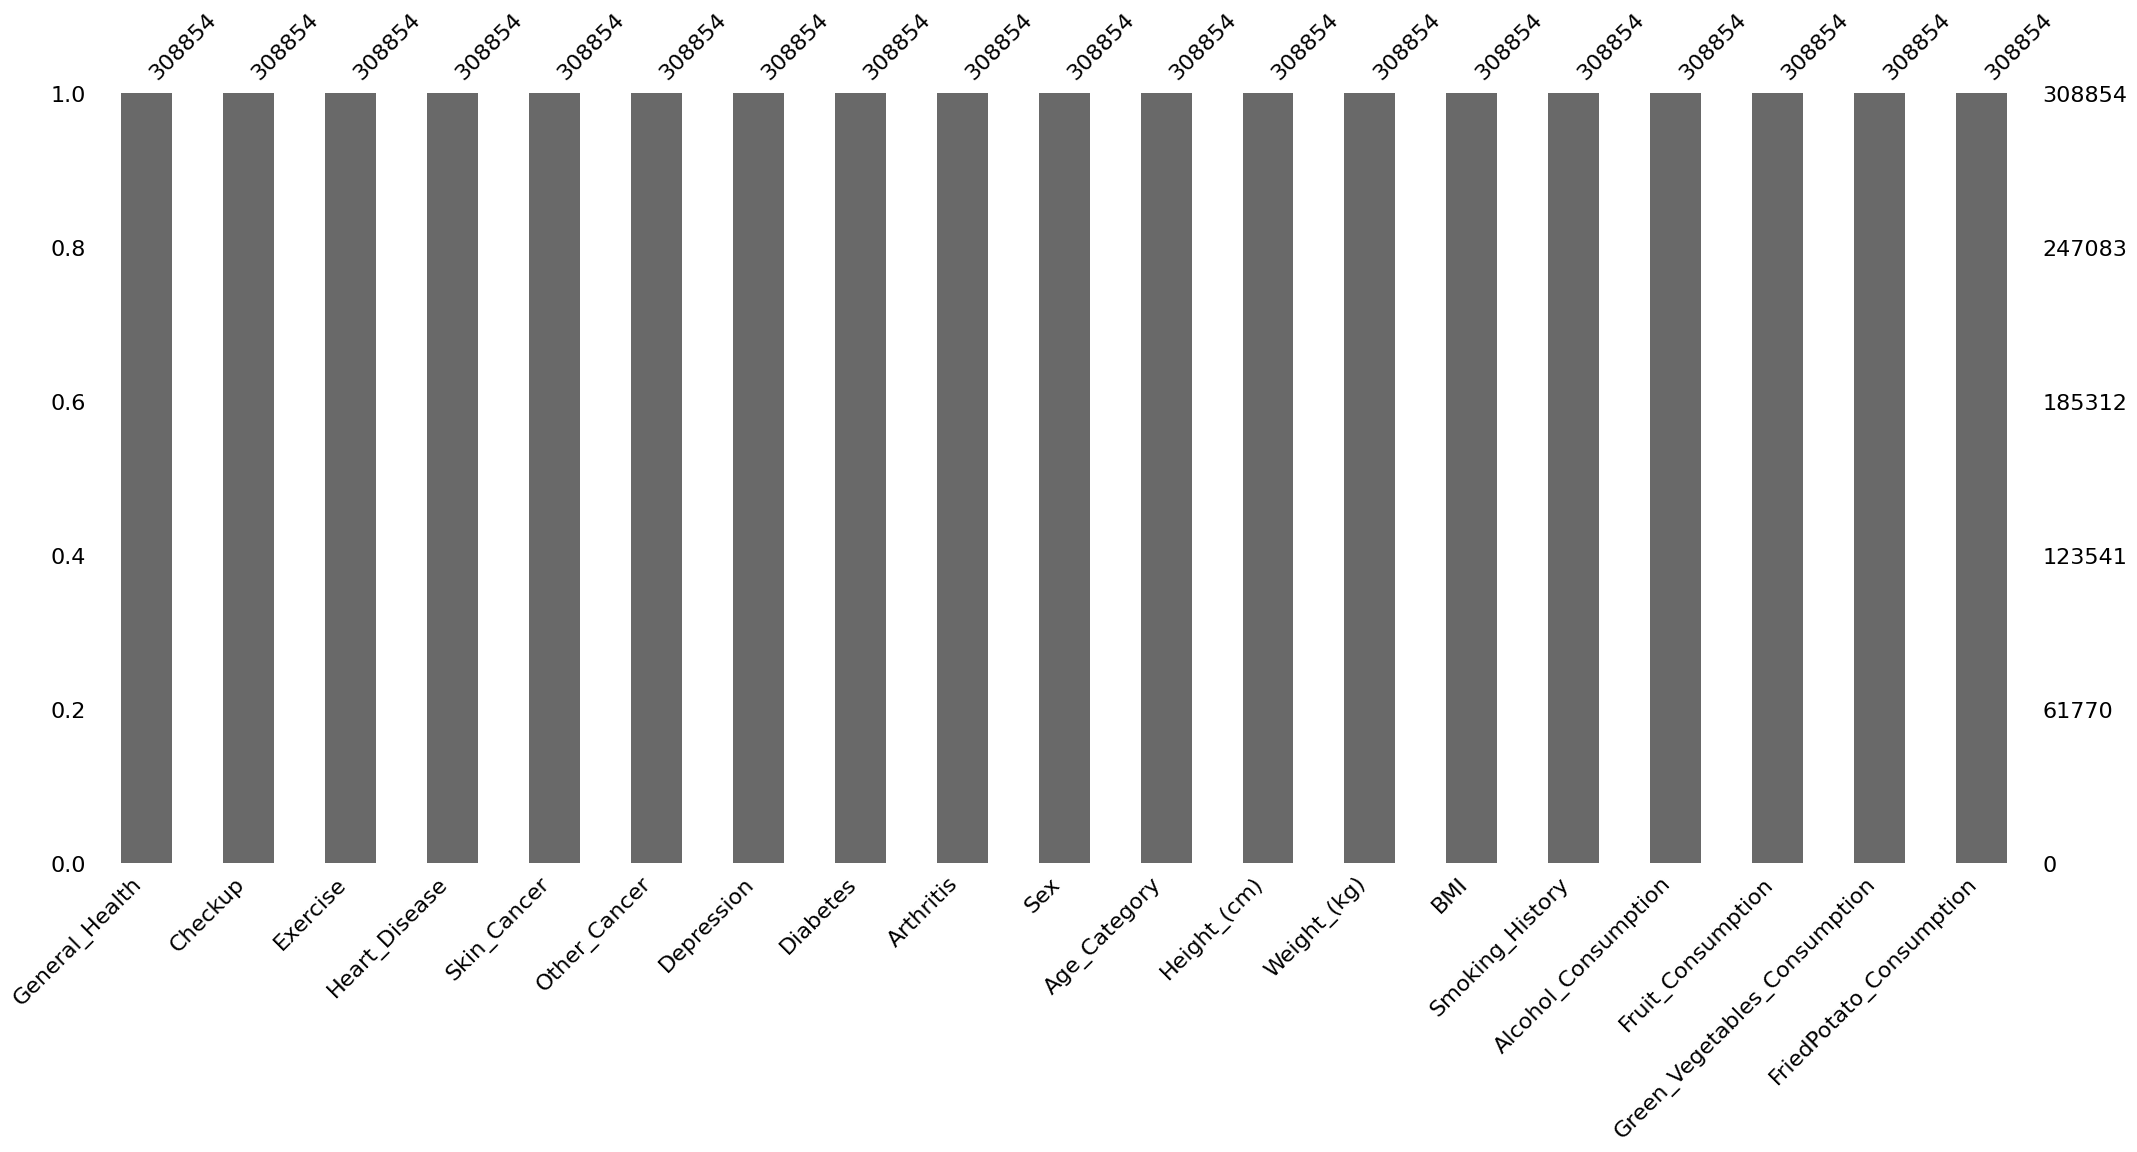

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
df['General_Health'].value_counts()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
df.shape
print("Number of rows :",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows : 308854
Number of columns: 19


# ***Exploratory  Data Analysis***

array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

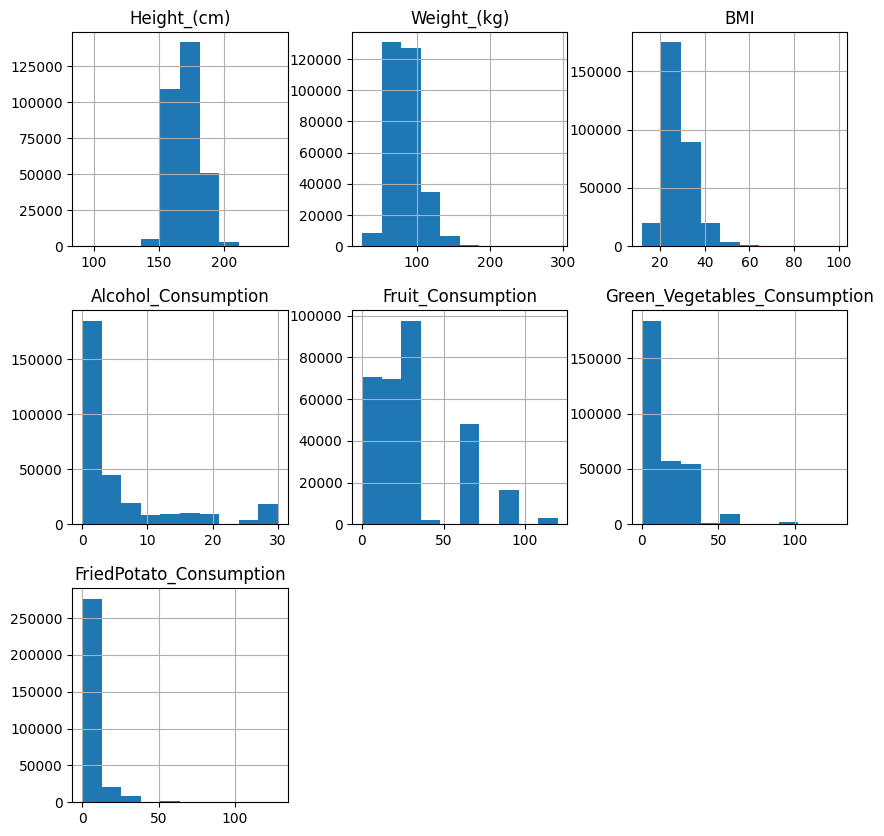

In [ ]:
df.hist(figsize=(10, 10))

<Axes: >

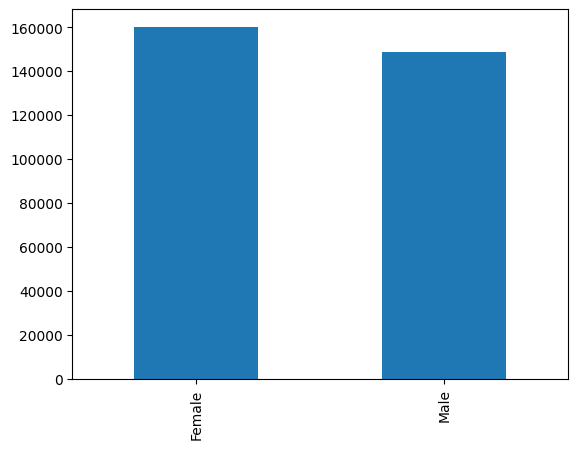

In [ ]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: xlabel='Height_(cm)', ylabel='Weight_(kg)'>

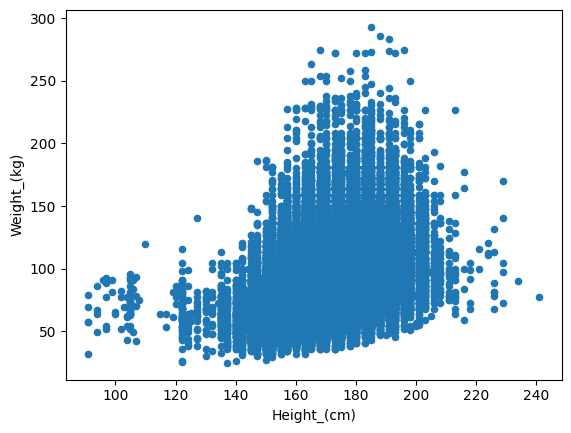

In [ ]:
df.plot.scatter(x='Height_(cm)', y='Weight_(kg)')

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                              Height_(cm)  Weight_(kg)       BMI  \
Height_(cm)                      1.000000     0.472186 -0.027408   
Weight_(kg)                      0.472186     1.000000  0.859699   
BMI                             -0.027408     0.859699  1.000000   
Alcohol_Consumption              0.128835    -0.032373 -0.108684   
Fruit_Consumption               -0.045911    -0.090612 -0.076611   
Green_Vegetables_Consumption    -0.030148    -0.075904 -0.070640   
FriedPotato_Consumption          0.108795     0.096351  0.048366   

                              Alcohol_Consumption  Fruit_Consumption  \
Height_(cm)                              0.128835          -0.045911   
Weight_(kg)                             -0.032373          -0.090612   
BMI                                     -0.108684          -0.076611   
Alcohol_Consumption                      1.000000          -0.012562   
Fruit_Consumption                       -0.012562           1.000000   
Green_Vegetables_Consum

<ipython-input-20-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

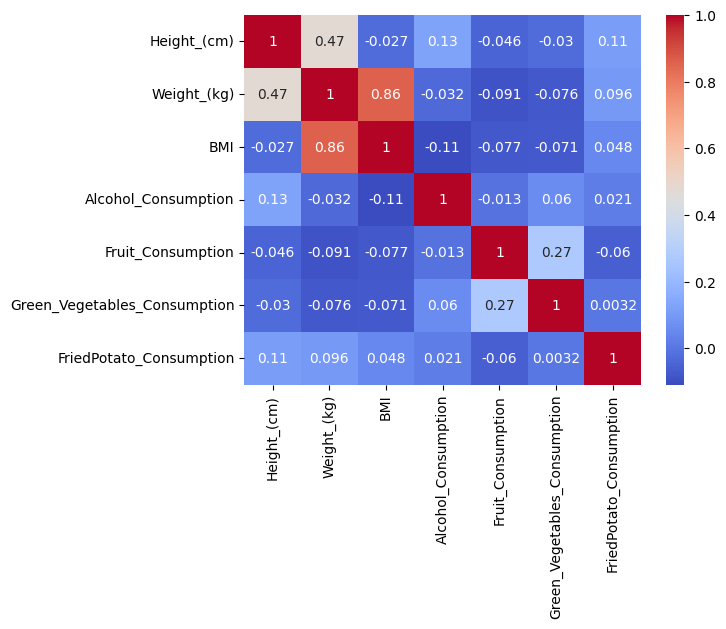

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
categorical_columns = ["Checkup", "Exercise", "Heart_Disease", "Sex", "Age_Category"]
for col in categorical_columns:
    print("\nDistribution of", col, ":")
    print(df[col].value_counts())


Distribution of Checkup :
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

Distribution of Exercise :
Yes    239381
No      69473
Name: Exercise, dtype: int64

Distribution of Heart_Disease :
No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

Distribution of Sex :
Female    160196
Male      148658
Name: Sex, dtype: int64

Distribution of Age_Category :
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: Age_Category, dtype: int64


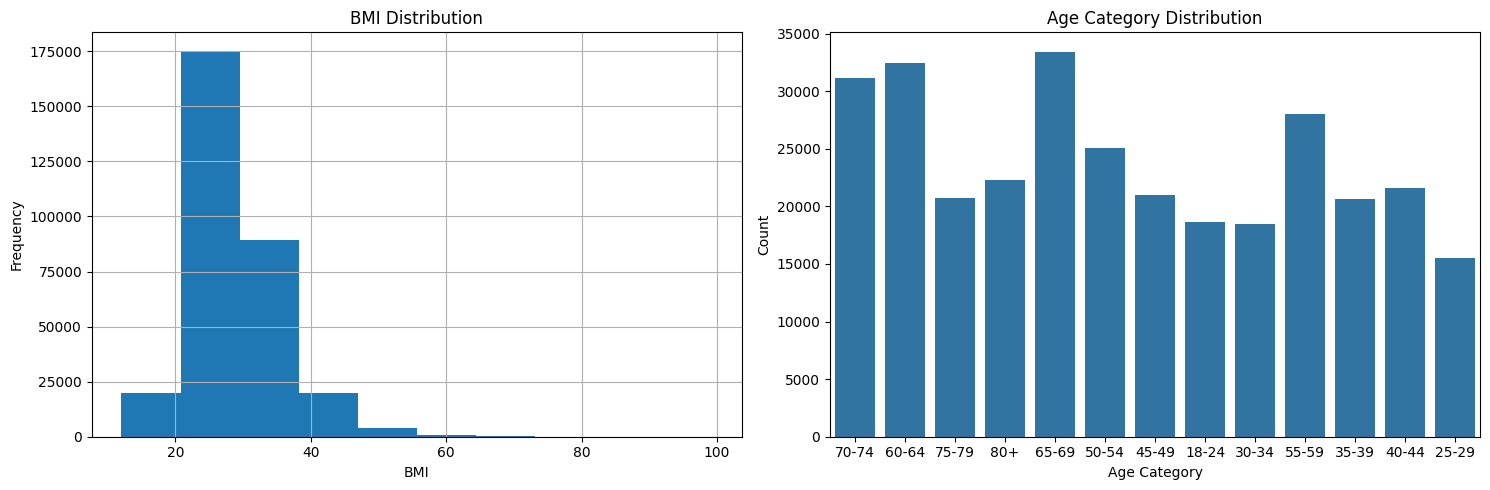

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df['BMI'].hist()
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='Age_Category', data=df)
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
average_bmi_by_sex = df.groupby('Sex')['BMI'].mean()
print("\nAverage BMI by Sex:")
print(average_bmi_by_sex)


Average BMI by Sex:
Sex
Female    28.557168
Male      28.700612
Name: BMI, dtype: float64


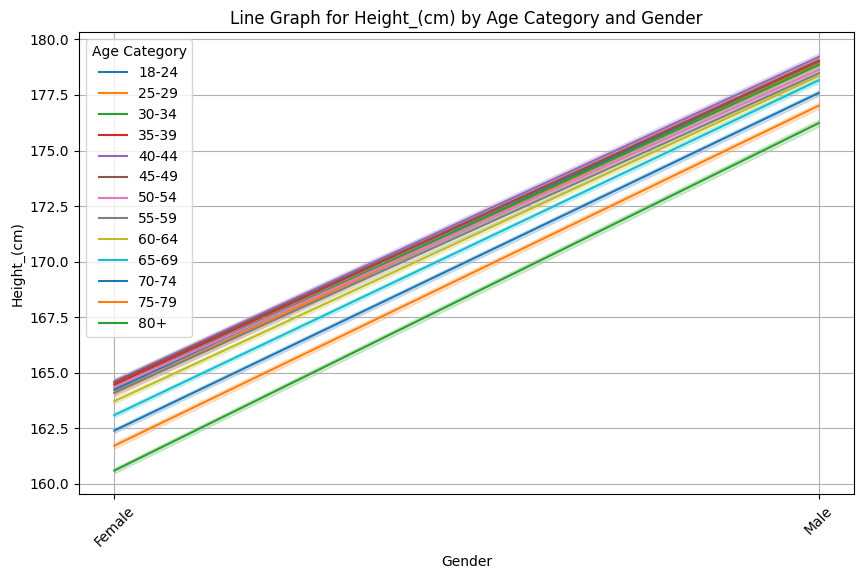

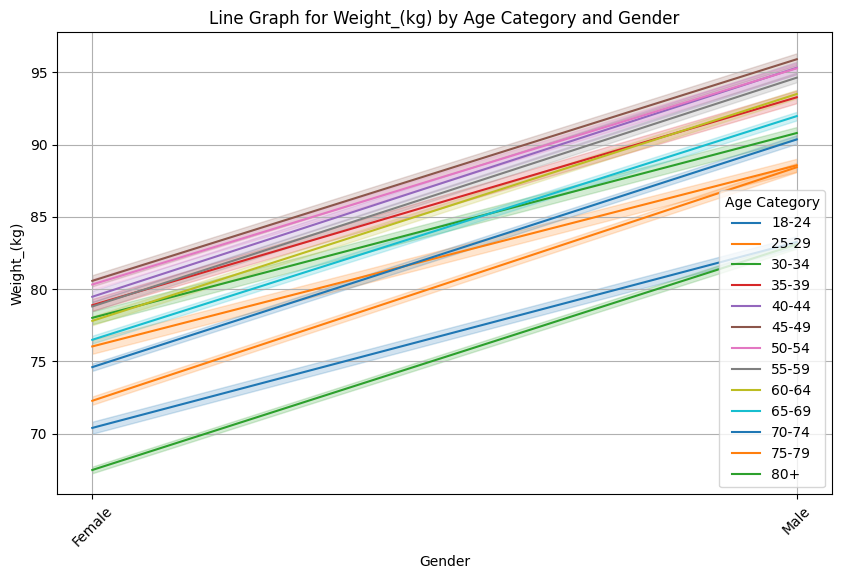

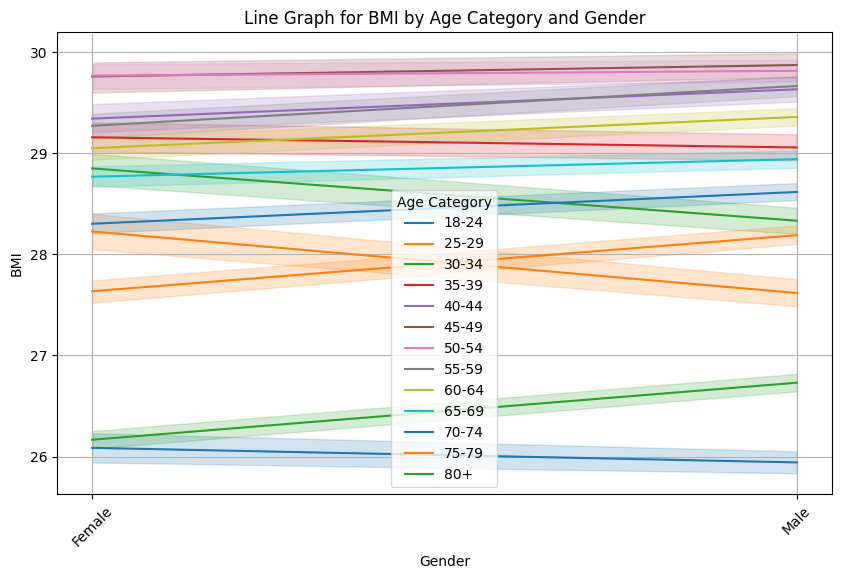

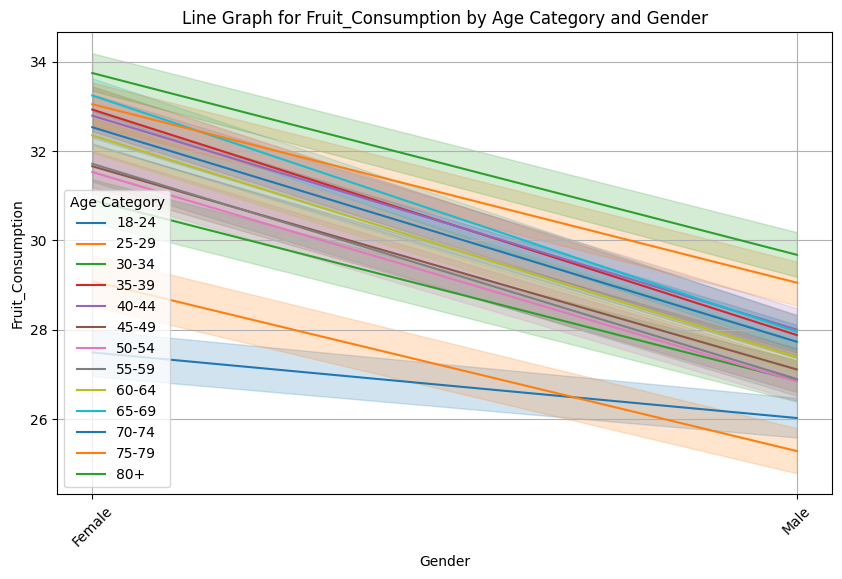

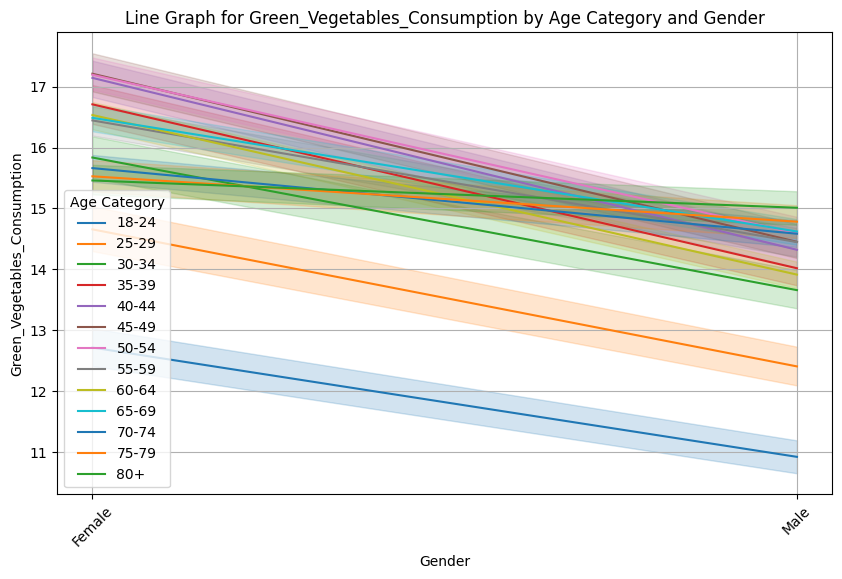

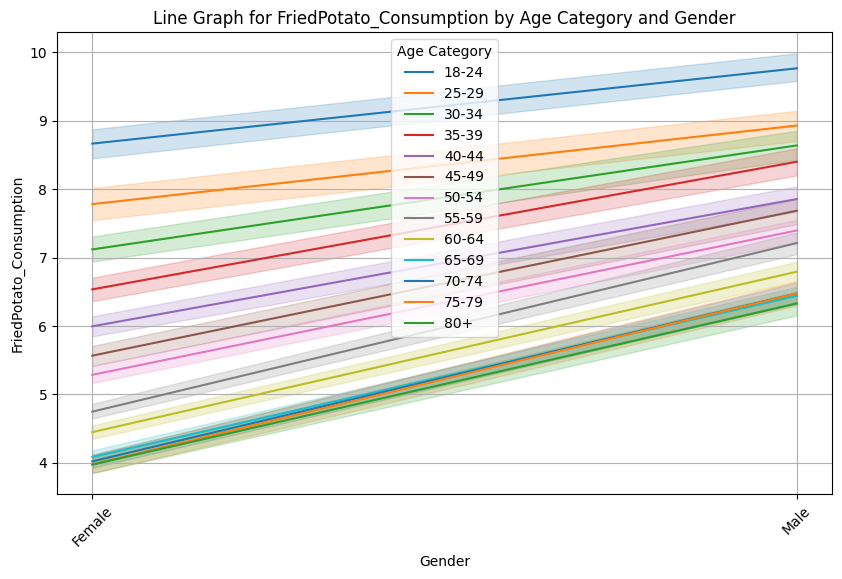

In [ ]:
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
age_categories = sorted(df['Age_Category'].unique())

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    for age_cat in age_categories:
        sns.lineplot(data=df[df['Age_Category'] == age_cat], x='Sex', y=feature, label=age_cat)
    plt.title(f'Line Graph for {feature} by Age Category and Gender')
    plt.xlabel('Gender')
    plt.ylabel(feature)
    plt.legend(title='Age Category')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## ***DATA SPLITING***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [ ]:
X = df.drop(columns=['General_Health'])
y = df['General_Health']
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (247083, 18), (247083,)
Test: (61771, 18), (61771,)


In [ ]:
print(X)

                        Checkup Exercise Heart_Disease Skin_Cancer  \
0       Within the past 2 years       No            No          No   
1          Within the past year       No           Yes          No   
2          Within the past year      Yes            No          No   
3          Within the past year      Yes           Yes          No   
4          Within the past year       No            No          No   
...                         ...      ...           ...         ...   
308849     Within the past year      Yes            No          No   
308850  Within the past 5 years      Yes            No          No   
308851      5 or more years ago      Yes            No          No   
308852     Within the past year      Yes            No          No   
308853     Within the past year      Yes            No          No   

       Other_Cancer Depression                                    Diabetes  \
0                No         No                                          No   
1  

In [ ]:

print(y)

0              Poor
1         Very Good
2         Very Good
3              Poor
4              Good
            ...    
308849    Very Good
308850         Fair
308851    Very Good
308852    Very Good
308853    Excellent
Name: General_Health, Length: 308854, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Smoking_History'] = label_encoder.fit_transform(df['Smoking_History'])


# ***ML Model***

In [ ]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['General_Health'] =label_encoder.fit_transform(df['General_Health'])

In [ ]:
categorical_columns = ['Smoking_History', 'General_Health', 'Checkup', 'Exercise',
                       'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                       'Diabetes', 'Arthritis', 'Sex', 'Age_Category']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes

General_Health                    int64
Checkup                           int64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                      int64
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical=["Smoking_History"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.0, 1.0, 'Within the past 2 years', ..., 30, 16, 12],
       [1.0, 0.0, 'Within the past year', ..., 30, 0, 4],
       [1.0, 0.0, 'Within the past year', ..., 12, 3, 16],
       ...,
       [0.0, 1.0, '5 or more years ago', ..., 40, 8, 4],
       [1.0, 0.0, 'Within the past year', ..., 30, 12, 0],
       [1.0, 0.0, 'Within the past year', ..., 5, 12, 1]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['General_Health'] =label_encoder.fit_transform(df['General_Health'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Checkup'] =label_encoder.fit_transform(df['Checkup'])

In [ ]:
df.dtypes

General_Health                    int64
Checkup                           int64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                      int64
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

# ***K_Fold_Cross_Validation***

In [ ]:
Building a Predictive Systemimport pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for col in df.columns:
    print(col, df[col].unique())

label_encoders = {}
categorical_columns = ['Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
                       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

X = df.drop(columns=['General_Health'])
y = df['General_Health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

K_Fold_Cross_Validation_Accuracy = accuracy_score(y_test, y_pred)
print("K_Fold_Cross_Validation_Accuracy:", K_Fold_Cross_Validation_Accuracy)


General_Health [3 4 2 1 0]
Checkup [2 4 0 3 1]
Exercise [0 1]
Heart_Disease [0 1]
Skin_Cancer [0 1]
Other_Cancer [0 1]
Depression [0 1]
Diabetes [0 2 1 3]
Arthritis [1 0]
Sex [0 1]
Age_Category [10  8 11 12  9  6  5  0  2  7  3  4  1]
Height_(cm) [150 165 163 180 191 183 175 160 168 178 152 157 188 185 170 173 155 193
 196 206 198 140 135 145 147 142 201 218 124 203 137 122 216 224 229 151
 177 164 162 156 153 169 167 172 106 190 143 171 154 176 200 146 148 158
 159 187 104 120 107 211 226 182 213  97 184 125 127 234 130 119 132 105
 166 181 186  91 174 208 149  96 197 161  94 103 221 134 144 189 100 179
 117  99 102 110 241 115 205 195 108]
Weight_(kg) [ 32.66  77.11  88.45  93.44 154.22  69.85 108.86  72.57  91.63  74.84
  73.48  83.91 113.4   52.16 116.12  99.79  81.65 104.33  79.38  55.79
 124.74  81.19  70.31 112.49 147.42  84.82 102.06  64.41  60.78  61.23
  88.    90.72  49.9   85.28 120.2   69.4   62.14  65.77  89.81  66.68
  86.18  72.12  87.54  62.6   75.75  88.9   92.08  56.

# ***MLP Neural Network***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of MLP classifier: {accuracy_mlp}")


Accuracy of MLP classifier: 0.43256544333101293


# ***K_Nearest_Neighbour***

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

k = 5
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors=k))])

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

K_Nearest_Neighbour_Accuracy = accuracy_score(y_test, y_pred)
print("K_Nearest_Neighbour_Accuracy:", K_Nearest_Neighbour_Accuracy)


K_Nearest_Neighbour_Accuracy: 0.3560732382509592


# ***Logistic_Regression***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
Logistic_Regression_Accuracy = accuracy_score(y_test, y_pred)
print("Logistic_Regression_Accuracy:",Logistic_Regression_Accuracy)

Logistic_Regression_Accuracy: 0.42458435188033217


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
logistic_regression_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ***Random_Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=90)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
Random_Forest_Accuracy = accuracy_score(y_test, y_pred)
print("Random_Forest_Accuracy:", Random_Forest_Accuracy)

Random_Forest_Accuracy: 0.4057567466934322


# ***Graph of Different Accuracies***

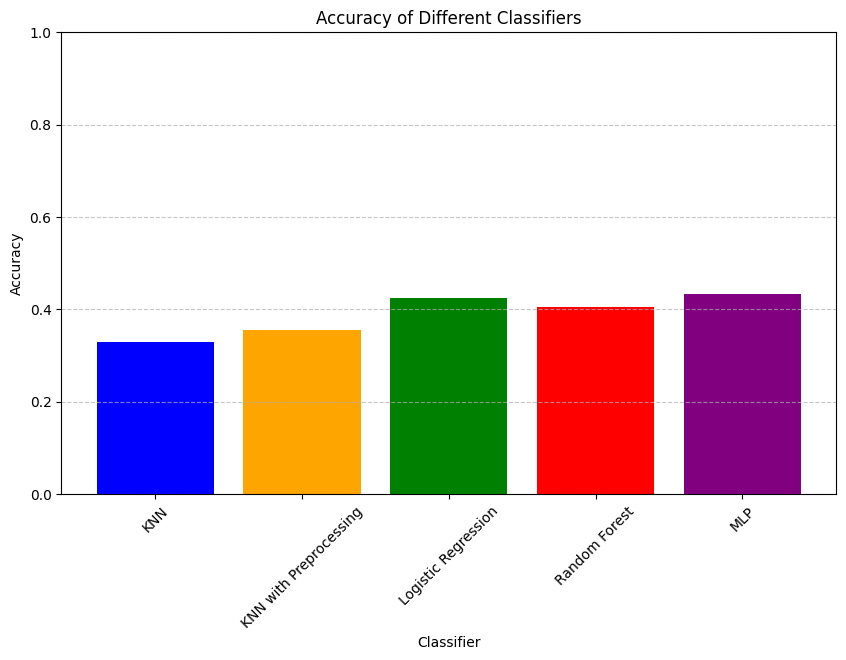

In [ ]:
import matplotlib.pyplot as plt

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)

classifier_names = ['KNN', 'KNN with Preprocessing', 'Logistic Regression', 'Random Forest', 'MLP']
accuracies = [K_Fold_Cross_Validation_Accuracy, K_Nearest_Neighbour_Accuracy,
              Logistic_Regression_Accuracy, Random_Forest_Accuracy, mlp_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


# ***Building a Predictive System***

In [ ]:
new_patient_data = {
    'Checkup': 'Within the past year', 'Exercise': 'No', 'Heart_Disease': 'No', 'Skin_Cancer': 'No',
    'Other_Cancer': 'No', 'Depression': 'No', 'Diabetes': 'No', 'Arthritis': 'No',
    'Sex': 'Female', 'Age_Category': '75-79', 'Height_(cm)': 160, 'Weight_(kg)': 62.6,
   'BMI': 24.45, 'Smoking_History': 'No', 'Alcohol_Consumption': 0, 'Fruit_Consumption': 20,'Green_Vegetables_Consumption':12,'FriedPotato_Consumption':5}
new_patient_df= pd.DataFrame([new_patient_data])

In [ ]:
print(new_patient_df.dtypes)

Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object


In [ ]:
categorical_columns = ['Smoking_History',  'Checkup', 'Exercise',
                       'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                       'Diabetes', 'Arthritis', 'Sex', 'Age_Category']
for col in categorical_columns:
    le = LabelEncoder()
    new_patient_df[col] = le.fit_transform(new_patient_df[col])

In [ ]:
print(new_patient_df.dtypes)

Checkup                           int64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                      int64
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object


In [ ]:
from sklearn.ensemble import RandomForestClassifier

predicted_health = rf_model.predict(new_patient_df)

print("Predicted general health:", predicted_health)

if(predicted_health[0]== 0):
	print("The Patient General Health is Very Good")
elif(predicted_health[0]== 1):
	print("The Patient General Health is Poor")
elif(predicted_health[0]== 2):
	print("The Patient General Health is Good")
elif(predicted_health[0]== 3):
	print("The Patient General Health is Excellent")
else:
	print("The Patient General Health is Fair")

Predicted general health: [0]
The Patient General Health is Very Good
